In [1]:
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def convolution(A,B):       
    lengthA = np.size(A)
    lengthB = np.size(B)
    C =np.zeros(lengthA+lengthB-1)        
    for m in np.arange(lengthA):   
        for n in np.arange(lengthB):        
            C[m+n] = C[m+n] + A[m]*B[n]                          
    return C

In [2]:
def convolution(x,h):       
    lengthX = np.size(x)
    lengthH = np.size(h)
    y =np.zeros(lengthX+lengthH-1)        
    for m in np.arange(lengthX):   
        for n in np.arange(lengthH):        
            y[m+n] = y[m+n] + x[m]*h[n]                          
    return y

In [20]:
def convolution_flip(x,h):       
    lengthX = np.size(x)
    lengthH = np.size(h)
    y =np.zeros(lengthX+lengthH-1)        
    for m in np.arange(lengthX):   
        for n in np.arange(lengthH):        
            y[m] = y[m] + x[n]*h[m-n]                          
    return y

In [22]:
def convolution_flip_fix1(x,h):       
    lengthX = np.size(x)
    lengthH = np.size(h)
    y =np.zeros(lengthX+lengthH-1)        
    for m in np.arange(lengthX):   
        for n in np.arange(lengthH):  
            if m-n>=0:
                y[m] = y[m] + x[n]*h[m-n]                          
    return y

In [24]:
def convolution_flip_fix2(x,h):       
    lengthX = np.size(x)
    lengthH = np.size(h)
    y =np.zeros(lengthX+lengthH-1)        
    for m in np.arange(np.size(y)):   
        for n in np.arange(lengthH):  
            if m-n>=0:
                y[m] = y[m] + x[n]*h[m-n]                          
    return y

In [25]:
def convolution_flip_fix3(x,h):       
    lengthX = np.size(x)
    lengthH = np.size(h)
    y =np.zeros(lengthX+lengthH-1)        
    for m in np.arange(np.size(y)):   
        for n in np.arange(lengthH):  
            if m-n>=0 and m-n<lengthH-1:
                if m == 0:
                    print(m-n)
                y[m] = y[m] + x[n]*h[m-n]                          
    return y

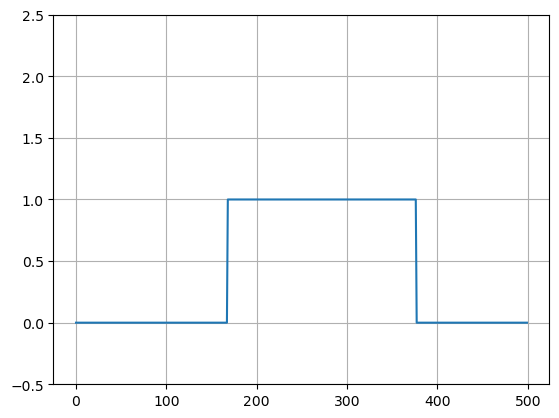

In [26]:
t = np.linspace(0.15, 0.35, 500, endpoint=False)

plt.ylim(-0.5, 2.5)
sig1 = signal.square(2 * np.pi * 5.99 * t+4.4)+1
sig1 = sig1/2
plt.plot(sig1)
plt.grid('on')

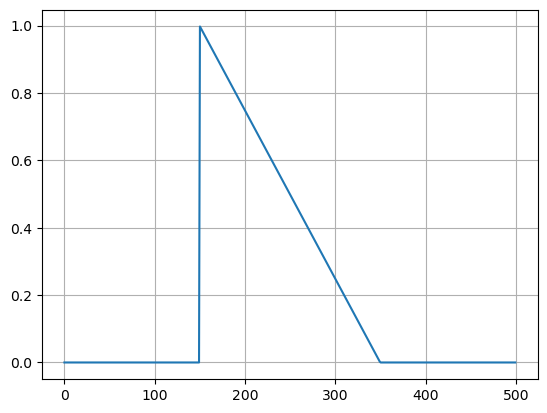

In [27]:
sigt = np.zeros_like(sig1)
sigt[150:350] = signal.triang(400)[200:]
plt.plot(sigt)
plt.grid('on')

In [28]:
len(sigt)

500

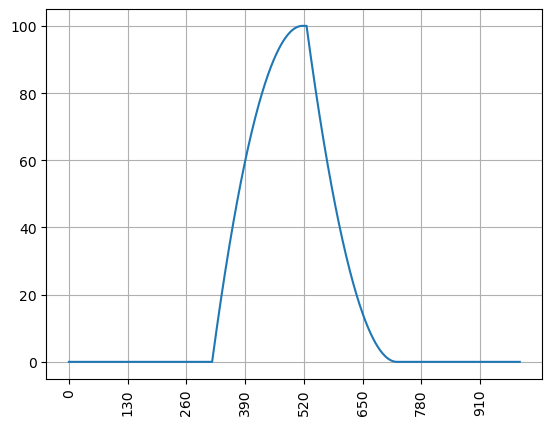

In [29]:
plt.plot(convolution(sig1,sigt))
plt.grid('on')
_=plt.xticks(np.arange(0,1000,130),rotation=90)

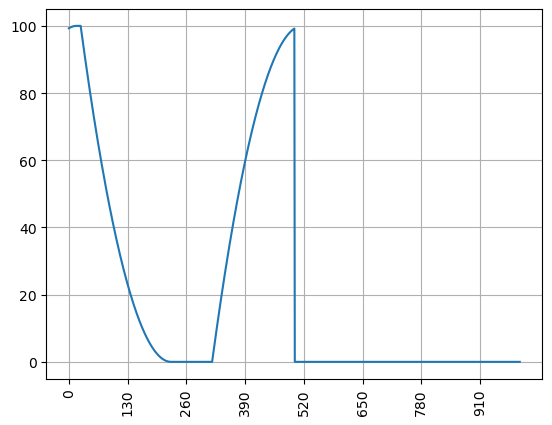

In [30]:
plt.plot(convolution_flip(sig1,sigt))
plt.grid('on')
_=plt.xticks(np.arange(0,1000,130),rotation=90)

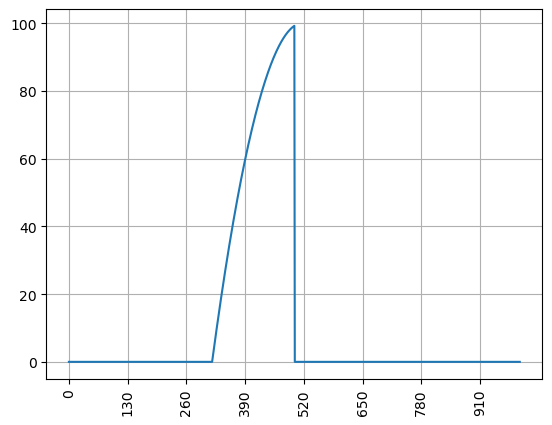

In [31]:
plt.plot(convolution_flip_fix1(sig1,sigt))
plt.grid('on')
_=plt.xticks(np.arange(0,1000,130),rotation=90)

In [32]:
plt.plot(convolution_flip_fix2(sig1,sigt))
plt.grid('on')
_=plt.xticks(np.arange(0,1000,130),rotation=90)

IndexError: index 500 is out of bounds for axis 0 with size 500

0


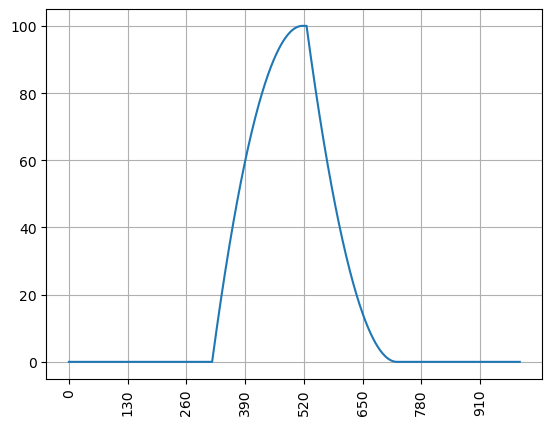

In [33]:
plt.plot(convolution_flip_fix3(sig1,sigt))
plt.grid('on')
_=plt.xticks(np.arange(0,1000,130),rotation=90)

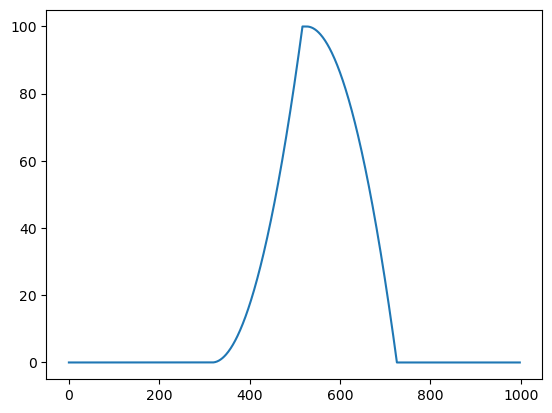

In [34]:
plt.plot(convolution(sig1,np.flip(sigt,axis=0)))

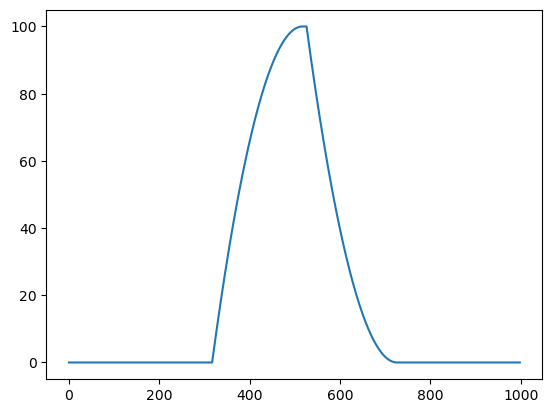

In [35]:
plt.plot(np.convolve(sig1,sigt,'full'))

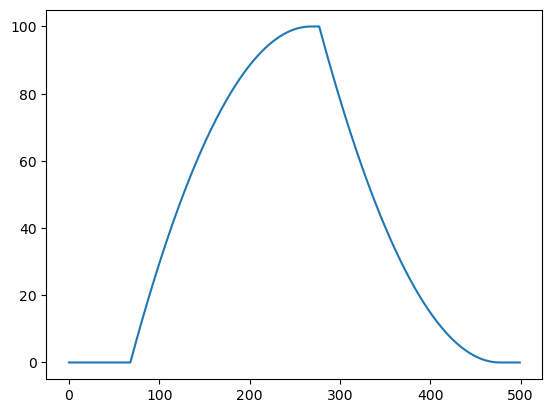

In [36]:
plt.plot(np.convolve(sig1,sigt,'same'))

In [37]:
np.convolve(sig1,sigt,'valid')

array([99.19])

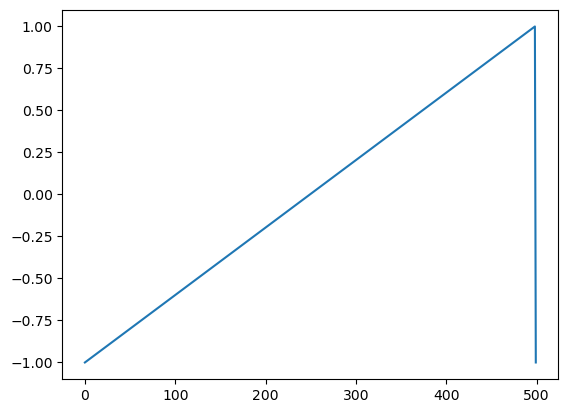

In [38]:
t = np.linspace(0, 0.2, 500)

sig2 = signal.sawtooth(2 * np.pi * 5 * t)
plt.plot(sig2)

In [39]:
out = convolution(sig1,sig2)

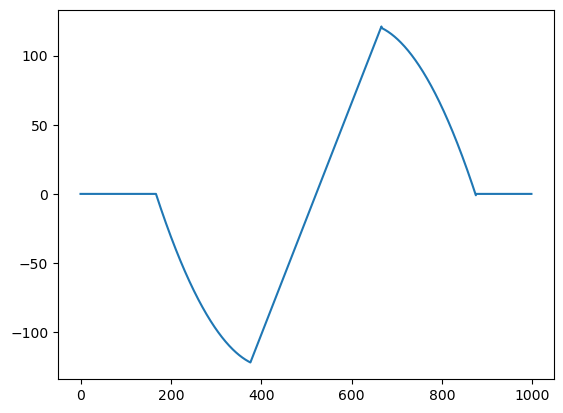

In [40]:
plt.plot(out)
#plt.plot(np.convolve(sig1,sig2,'full'))

In [41]:
out.shape

(999,)

In [42]:
sig2.shape

(500,)

In [43]:
sig1.shape

(500,)

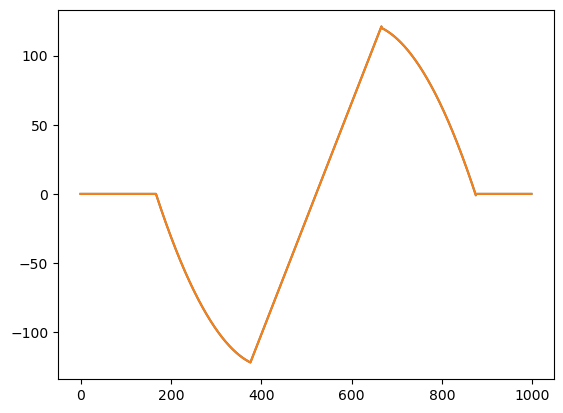

In [44]:
plt.plot(out)
plt.plot(np.convolve(sig1,sig2,'full'))

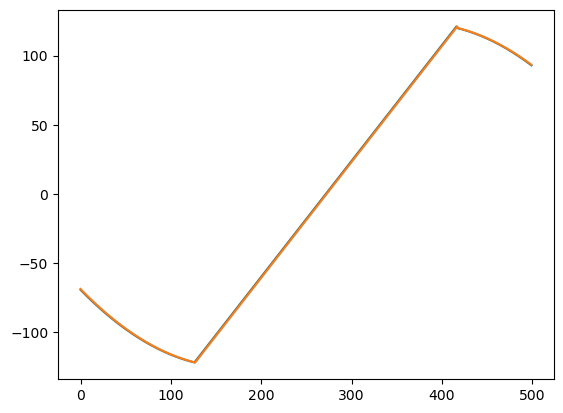

In [45]:
plt.plot(out[250:750])
plt.plot(np.convolve(sig1,sig2,'same'))

In [46]:
temp = np.random.rand(100,1)

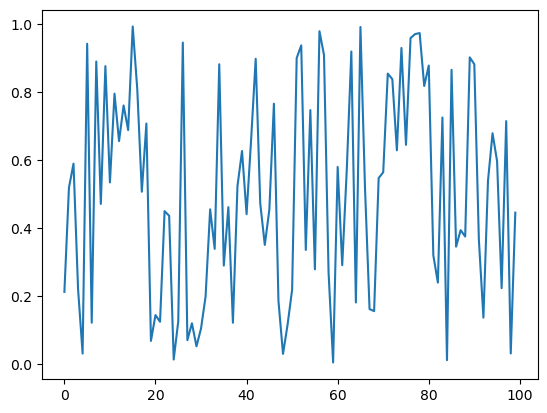

In [47]:
plt.plot(temp)

In [48]:
b = np.flipud(temp);

In [49]:
x = np.c_[np.random.randn(200,1).T, temp.T, np.random.randn(300,1).T];
x1 = np.c_[0*np.random.randn(200,1).T, temp.T, 0*np.random.randn(300,1).T];

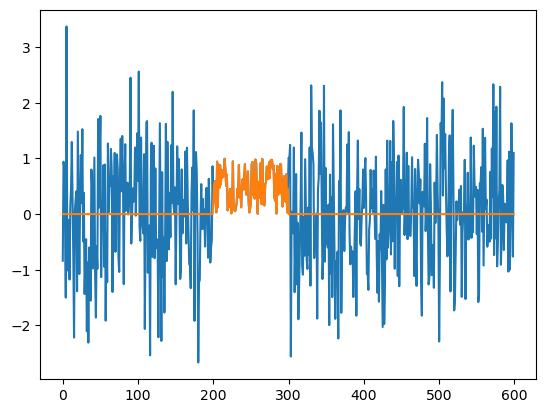

In [50]:
plt.plot(x.T)
plt.plot(x1.T)

In [51]:
y = np.convolve(np.squeeze(x),np.squeeze(b))

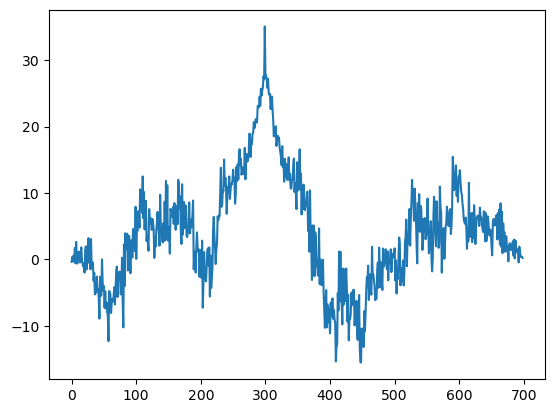

In [52]:
plt.plot(y)

(-2.0, 2.0)

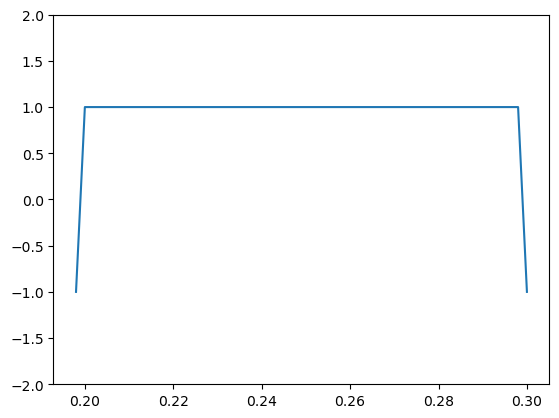

In [53]:
t = np.linspace(0.0, 1.0, 500, endpoint=False)
t1 = t[99:151]
temp = signal.square(2 * np.pi * 5 * t1)
plt.plot(t1,temp)
plt.ylim(-2, 2)

(-2.0, 2.0)

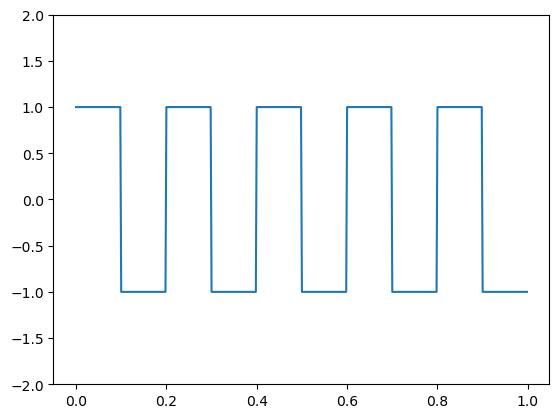

In [54]:
sig1 = signal.square(2 * np.pi * 5 * t)


plt.plot(t,sig1)
plt.ylim(-2, 2.0)

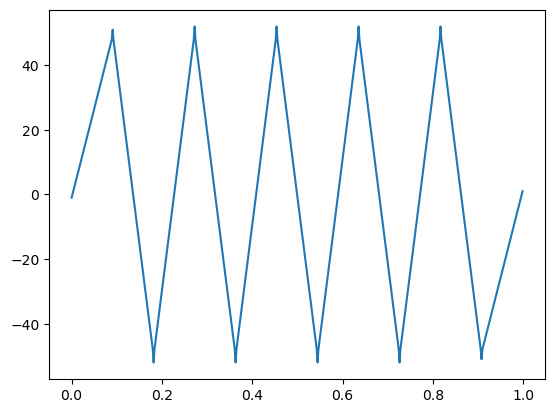

In [55]:
c = convolution(sig1,temp)

t2 = np.linspace(0, 1.0, 551, endpoint=False)
plt.plot(t2,c)

In [56]:
sigN = sig1+np.random.normal(0,2,500)

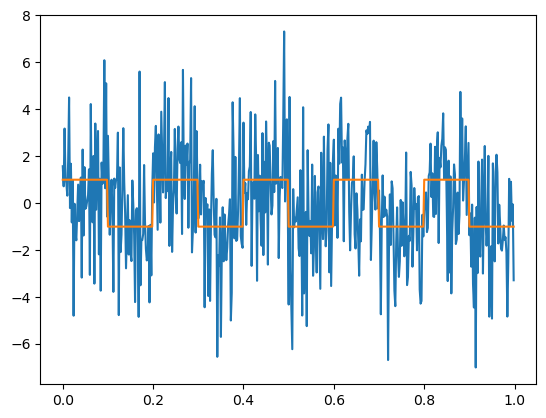

In [57]:
plt.plot(t,sigN)
plt.plot(t,sig1)

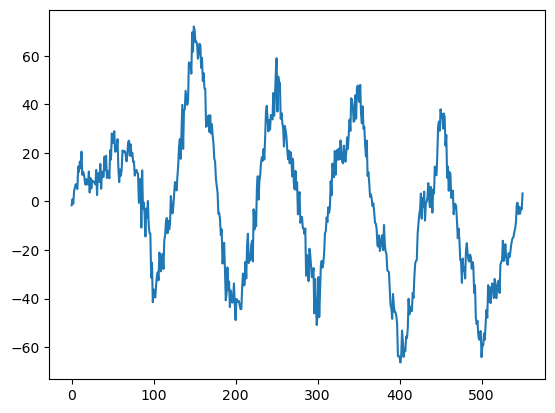

In [58]:
c = np.convolve(sigN,temp)
#t2 = np.linspace(0, 1.0, 551, endpoint=False)
plt.plot(c)